Para el proyecto, elegi un DataSet que recolecta informacion sobre poco menos de 2000 vinos tintos, de distinta marca y tipo, estudiando cada uno para obtener informacion sobre su composicion. dandonos las variables en doce columnas diferentes las cules son la acidez fija, acidez volatil, acidez cítrica, azucar residual, cloruros, dioxido de azuflre libre y total, densidad, pH, sulfatos, nivel de alcohol y finalmente, la calidad del mismo, dada con una nota del 1 al 8.
Mediante el analisis de los datos responder las preguntas que surjan e intentaremos probar la hipotesis: No todos los vinos de máxima caldiad son iguales en cada una de sus variables

Importamos Pandas, Matplotlib con pyplot NumPy y Seaborn





In [4]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Importamos el DataSet.


In [11]:
df = pd.read_csv('winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
df.info()

Usamos df.info() para ver la cantidad de no nulos presentes en el Dataset y confirmar la fidelidad de los datos, tenemos la misma cantidad de no nulos en todas las columnas, por lo que los datos estan bien

Vamos a hacer distintos analisis tanto en la distribucion y caracteristicas del vino como en la relacion entre las variables y la calidad del mismo.

Comenzaremos viendo la distribucion y nos preguntamos ¿Cuál es la distribución de la calidad del vino?

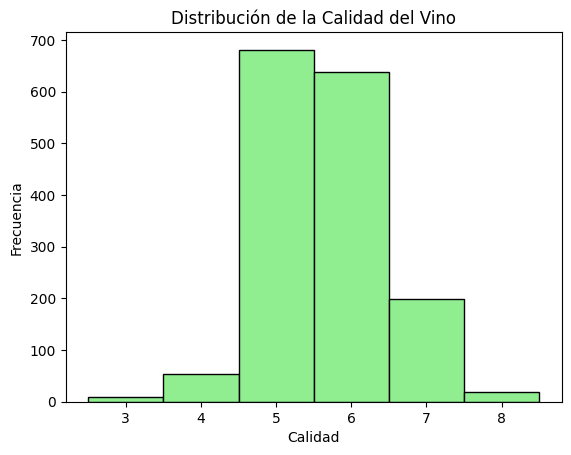

In [ ]:
# Para que el grafico tenga simetria
bin_edges = np.arange(df['quality'].min() - 0.5, df['quality'].max() + 1.5, 1)
# Creamos un historigrama para ver con que frecuencia se da cada nota en los vinos analizados
plt.hist(df['quality'], bins=bin_edges, edgecolor='black', color='lightgreen')

plt.title('Distribución de la Calidad del Vino')
plt.xlabel('Calidad')
plt.ylabel('Frecuencia')

plt.show()

Los datos nos muestran varias cosas, en primer lugar la calidad promedio es de 5-6 y la cantidad de vinos de calidad 8 es muy reducida, sin embargo parece que son mas comunes los vinos de alta calidad que los de muy baja calidad.

Otro pregunta que puede surgir es ¿La cantidad de alcohol afecta al vino?, ¿Es mejor un vino que tiene mas alcohol que uno que tiene menos? Veamos el grafico:

<ipython-input-81-497a8e97bc36>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality', y='alcohol', data=df, palette='viridis')


Text(0, 0.5, 'Alcohol')

<Figure size 1000x600 with 0 Axes>

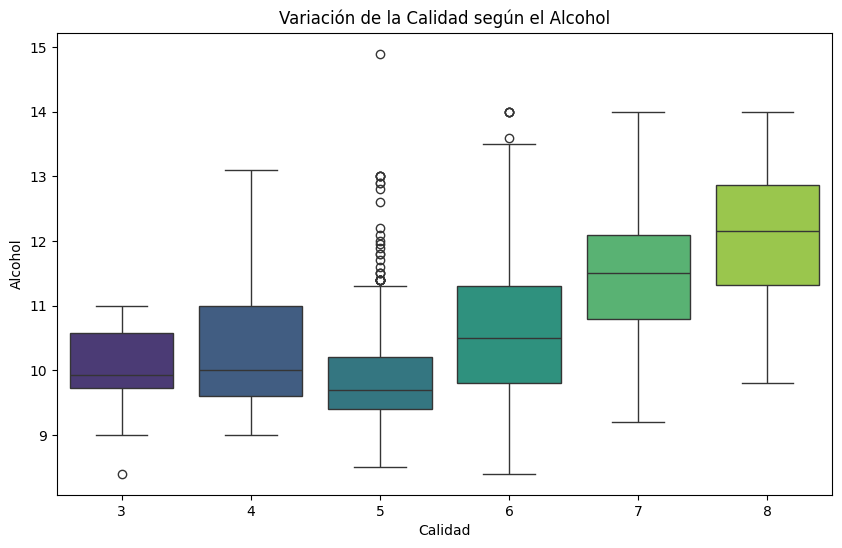

In [ ]:
plt.figure(figsize=(10, 6))
plt.figure(figsize=(10, 6))
#Haremos un plotbox para ver la relacion entre la calidad, la cantidad de alcohol y la cantidad de vinos
sns.boxplot(x='quality', y='alcohol', data=df, palette='viridis')

plt.xlabel('Calidad')
plt.ylabel('Alcohol')

plt.title('Variación de la Calidad según el Alcohol')
plt.xlabel('Calidad')
plt.ylabel('Alcohol')

plt.xlabel('Calidad')
plt.ylabel('Alcohol')

plt.title('Variación de la Calidad según el Alcohol')
plt.xlabel('Calidad')
plt.ylabel('Alcohol')

Vemos que la cantidad de alcohol afecta a la calidad del vino; en la calidad 8 el nivel de alcohol promedia entre el 11,5% y el 13%, mientras que en en nivel de calidad 3 la media esta en 10%. aunque cuando vemos los vinos de calidad 5 y 6, donde practicamente se abarcan todos los valores desde 8,5% hasta 15% vemos que aunque el alcohol afecte, no es la unica variable, ya que vinos con la cantidad de alcohol adecuada para estar en nivel 8, tambien se encuentran en menores calidades

Analizemos una variable como la acidez fija, La acidez fija en el vino se refiere al conjunto de ácidos no volátiles presentes en el vino, es decir, aquellos ácidos que no se evaporan fácilmente al someter el vino a calentamiento; podriamos pensar que mientras mas acido es un vino es peor su calidad, ¿Es asi?

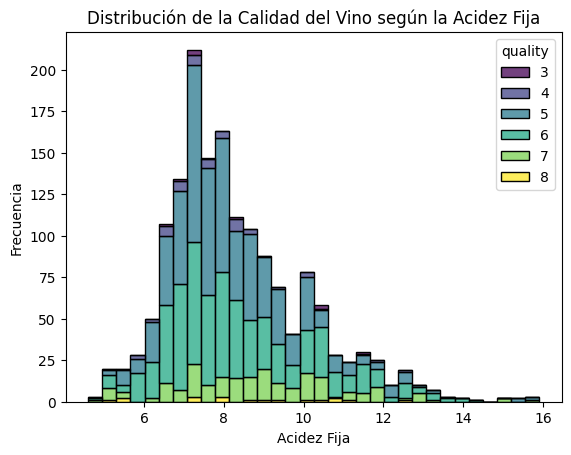

In [ ]:
sns.histplot(data=df, x='fixed acidity', hue='quality', multiple='stack', palette='viridis')

plt.title('Distribución de la Calidad del Vino según la Acidez Fija')
plt.xlabel('Acidez Fija')
plt.ylabel('Frecuencia')

plt.show()

A simple vista parece que la acidez si bien va desde 4 a 16, no afecta a la calidad, pues tenemos vinos de alta calidad en los dos extremos del grafico, veamos con los vinos de calidad 7-8

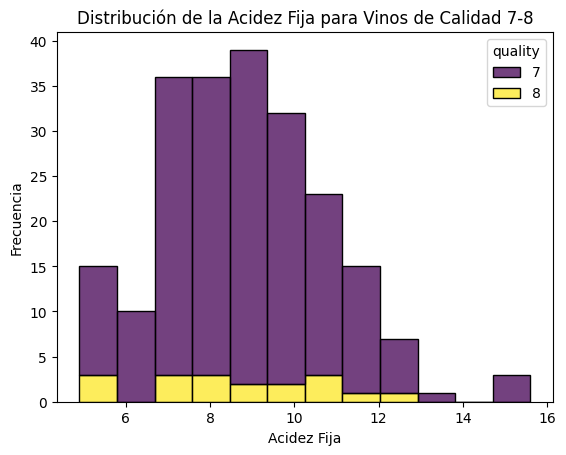

In [ ]:
# Filtramos para que solo se nos muestren los datos de los vinos de calidad entre 6 y 8
filtered_df = df[(df['quality'] >= 7) & (df['quality'] <= 8)]

sns.histplot(data=filtered_df, x='fixed acidity', hue='quality', palette='viridis', multiple='stack')

plt.title('Distribución de la Acidez Fija para Vinos de Calidad 7-8')
plt.xlabel('Acidez Fija')
plt.ylabel('Frecuencia')

plt.show()

Gracias a filtrar la informacion vemos que si bien puede ser distinta, logramos un mejor vino cuando la acidez fija de este esta entre 7 y 11, por lo que ¿A mayor acidez peor es el vino? la respuesta no es del todo clara, un vino puede tener alta calificacion teniendo mas acidez fija, aunque es probable que lo compense con otra variable por lo que consideramos que los datos no son suficientes para probar esto

Veamos otro ejemplo de como una variable sola afecta a la calidad del vino, por ejemplo, el pH; es una medida de la acidez activa del vino, es decir, de la concentración de iones de hidrógeno y tiene un impacto significativo en su sabor, color y conservación. Sabiendo esto, ¿Cual es el mejor pH para un vino? Veamos:

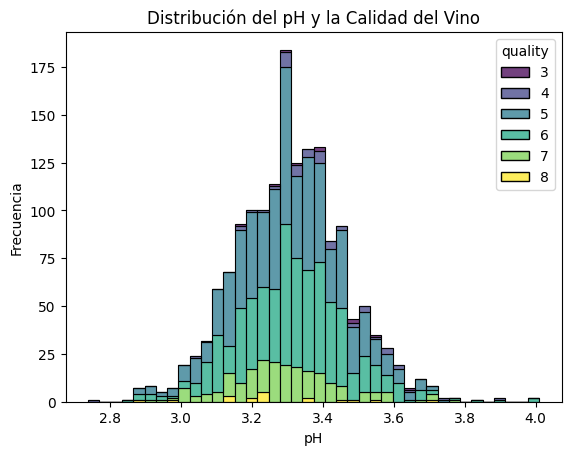

In [ ]:
sns.histplot(data=df, x='pH', hue='quality', palette='viridis', multiple='stack')

plt.title('Distribución del pH y la Calidad del Vino')
plt.xlabel('pH')
plt.ylabel('Frecuencia')

plt.show()

Se presenta el mismo caso, vemos que entre los 3.2 a 3.5 estan la mayor cantidad de vinos, pero no necesariamente los de mayor calidad, veremos mas en detalle los vinos de alta calidad para intentar determinar que pH es el mejor:

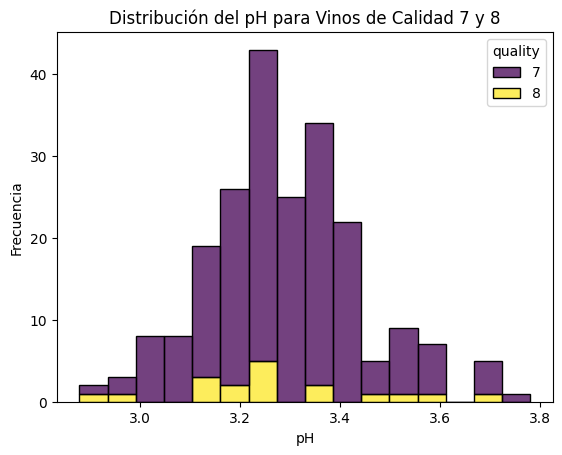

In [ ]:
filtered_df = df[(df['quality'] == 7) | (df['quality'] == 8)]

sns.histplot(data=filtered_df, x='pH', hue='quality', palette='viridis', multiple='stack')

plt.title('Distribución del pH para Vinos de Calidad 7 y 8')
plt.xlabel('pH')
plt.ylabel('Frecuencia')

plt.show()

Aqui nos queda claro que no hay un nivel de pH indicado, pero si vemos que es mas comun en vinos de alta calidad un pH entre 3.1 a 3.3, sin embargo hay vinos de calidad 8 en valores inferiores o mayores al promedio mencionado

Pasemos a otra variable par ver si afecta a la calidad del vino; los sulfatos: estos juegan un papel importante en su conservación y calidad, pero también tienen efectos que deben controlarse cuidadosamente. por lo que podemos preguntarnos ¿Cual es el nivel correcto de sulfatos para lograr un buen vino?

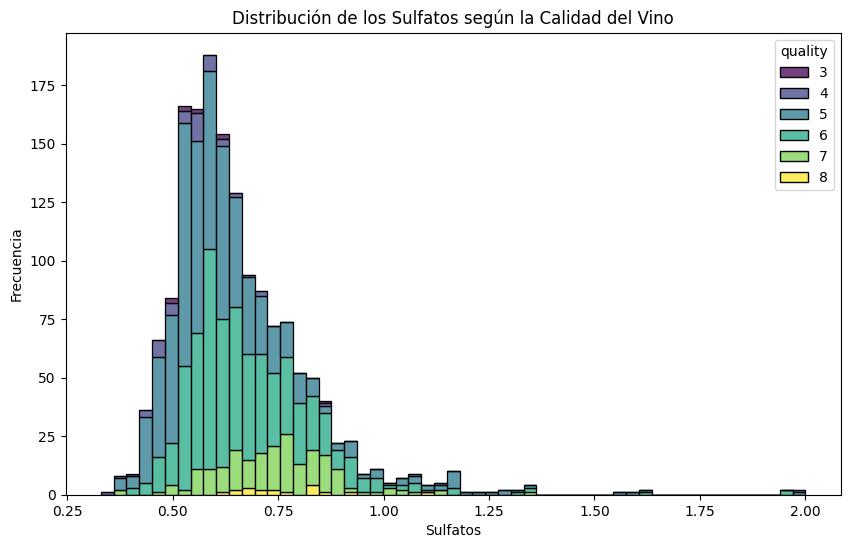

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='sulphates', hue='quality', palette='viridis', multiple='stack')

plt.title('Distribución de los Sulfatos según la Calidad del Vino')
plt.xlabel('Sulfatos')
plt.ylabel('Frecuencia')

plt.show()

Al ver los datos, nos damos cuenta que la calidad del vino es afectada por los sulfatos, con niveles inferiores a 0.50, la calidad no supera los 6 puntos, en sulfatos entre .50 y .60 estan la mayor cantidad de vinos, pero pocos de alta calidad, y entre .60 y .80 vemos que esta la mayor cantidad de vinos de calidad 7 y 8. Podemos verlo mas a detalle

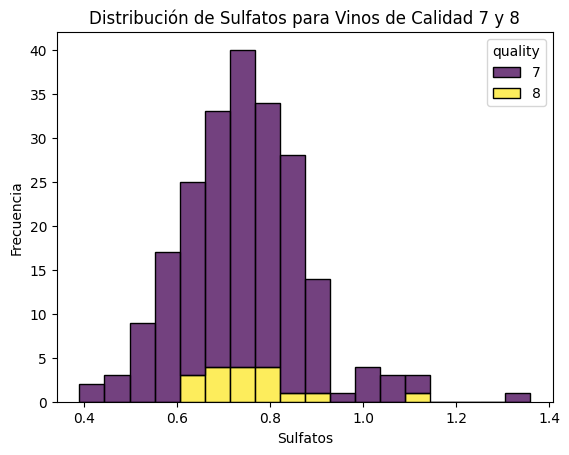

In [12]:
filtered_df = df[(df['quality'] == 7) | (df['quality'] == 8)]

sns.histplot(data=filtered_df, x='sulphates', hue='quality', palette='viridis', multiple='stack')
plt.title('Distribución de Sulfatos para Vinos de Calidad 7 y 8')
plt.xlabel('Sulfatos')
plt.ylabel('Frecuencia')
plt.show()

Aqui nos queda claro que para tener mas posibilidades de crear un vino de alta calidad, los sulfatos deben estar entre .60 y .80, si bien hay algunos que escapan de este promedio, son muchos los vinos que usan esta cantidad de sulfatos para lograr una buena caldiad

Pasemos a analizar como dos variables en conjunto afectan a la calidad del vino, investigue que variables en conjunto si pueden afectar a la calidad del vino, (ya que no todas en conjunto lo hacen), y veremos que arrojan los resultados

Analizaremos como la Acidez volátil y el Dióxido de azufre libre en conjunto afectan a la calidad del vino.

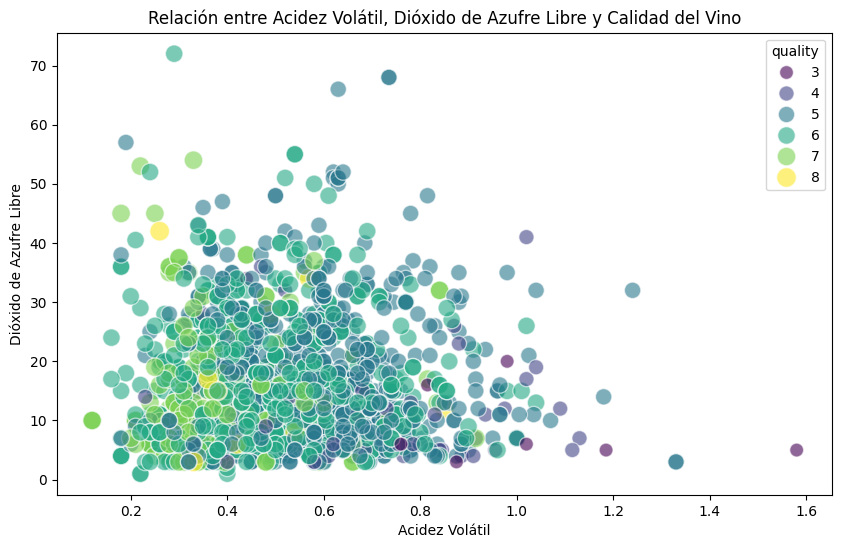

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='volatile acidity', y='free sulfur dioxide', hue='quality', palette='viridis', size='quality', sizes=(100, 200), alpha= 0.6)

plt.title('Relación entre Acidez Volátil, Dióxido de Azufre Libre y Calidad del Vino')
plt.xlabel('Acidez Volátil')
plt.ylabel('Dióxido de Azufre Libre')

plt.show()

Vemos que ambos parametros aumentan la calidad del vino cuando aumentan a la par, sin embargo cuando aumentan demasiado el vino pierde calidad. tambien vemos que los vinos con mucha acidez volatil y poca SO2 son de mala calidad, pero aquellos con mucho SO2 y poco Acidez Volatil, no necesariamente lo son

Veamos como otras dos variables en conjunto afectan a la calidad, en este caso, la acidez volatil y las azucares residuales.

Al investigar sabemos que expertos dicen que si el vino tiene un nivel bajo de azúcares residuales y alta acidez volátil, se percibe aún más la acidez, afectando negativamente su calidad.

¿Es esto cierto?

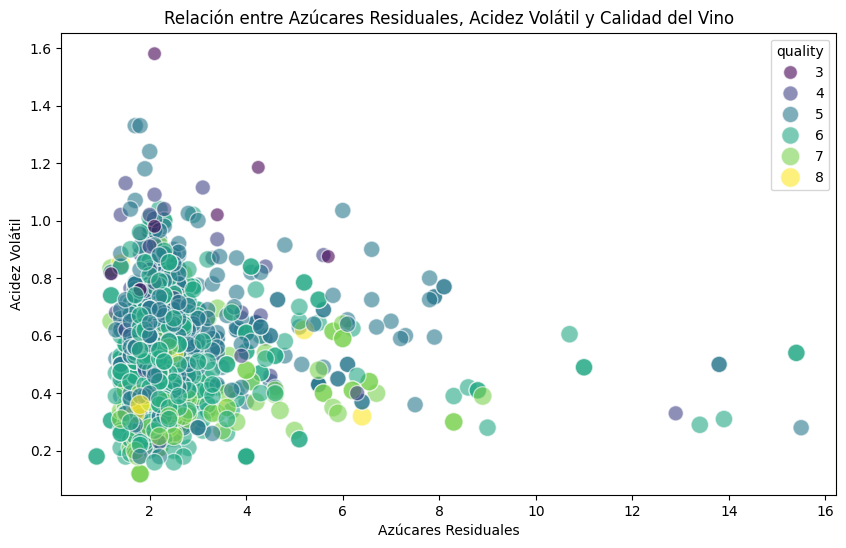

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='residual sugar', y='volatile acidity', hue='quality', palette='viridis',size='quality', sizes=(100, 200), alpha= 0.6)

plt.title('Relación entre Azúcares Residuales, Acidez Volátil y Calidad del Vino')
plt.xlabel('Azúcares Residuales')
plt.ylabel('Acidez Volátil')

plt.show()

Confirmamos, si el nivel de acidez volatil es alto y las azucares residuales son bajas, la calidad del vino se ve afectada, ademas, podemos deducir que un nivel balanceado de ambos es bueno para la calidad del vino, siempre y cuando la acidez no supere el 0,7 y los azucares el 7, tambien vemos que en general la acidez volatil afecta a la caldiad del vino, altos niveles de acidez volatil son malas para la calidad


Veamos como una variable previamente analizada afecta en conjunto a otra a la calidad; los sulfatos y los cloruros. Previamente sabiamos que los sulfatos debian mantenerse entre .6 a .8 para que la calidad sea alta, veamos si combinado a los cloruros esto varia

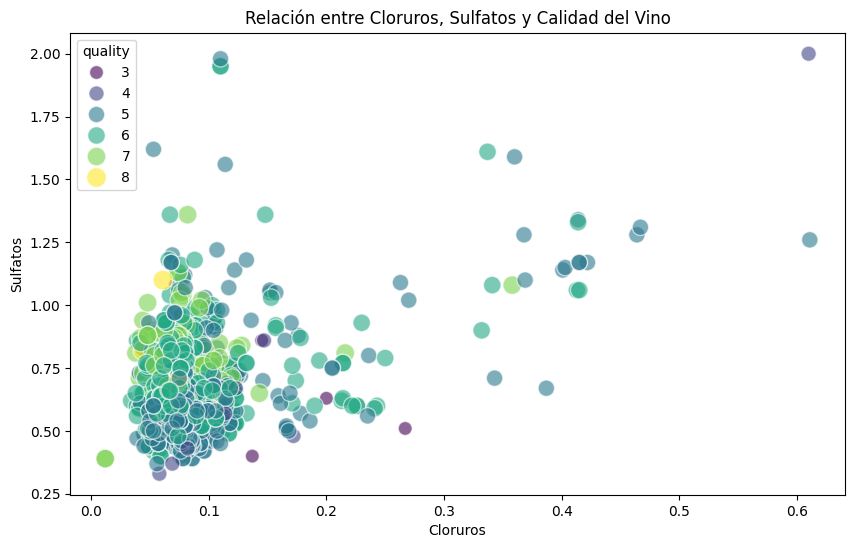

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='chlorides', y='sulphates', hue='quality', palette='viridis',size='quality', sizes=(100, 200), alpha= 0.6)

plt.title('Relación entre Cloruros, Sulfatos y Calidad del Vino')
plt.xlabel('Cloruros')
plt.ylabel('Sulfatos')

plt.show()

Los datos nos confirman el nivel ideal de sulfatos, ademas de darnos un rango de cloruros ideal para la calidad, en este caso, entre 0.05 y 0.15, pero no nos indican que los cloruros y los sulfatos se afecten mutuamente

A traves de los datos nos podemos llegar a varias conclusiones, la primera es que hay variables que se afectan entre si, como la acidez volatil y el dioxido de azufre libre, otras que no como los cloruros y los sulfatos. Ademas los datos analizados confirman la hipotesis, no todos los vinos de alta calidad son iguales en todas sus variables; algunas pueden coincidir que niveles cerca a tal punto son buenos para la calidad, como los sulfatos, pero otras variables pueden ser muy distintas y lograr una calidad de 8 puntos igualmente, como la acidez fija, donde hay vinos de 8 puntos con este valor en 5 y otros con este valor en 16